### ***Datamites - Project 1 - RICE LEAF DISEASE DETECTION***


## 1. Introduction
##### Problem Statement:
* This project aims to classify three major diseases affecting rice plants: Leaf smut, Brown spot, and Bacterial leaf blight, using machine learning models. The goal is to prepare a complete data analysis report, create a robust classification model, analyze data augmentation techniques, and compare the performance of different models.
 

##### 2. Dataset Description
Dataset:
The dataset contains 120 jpg images of disease-infected rice leaves, divided into three classes: Leaf smut, Brown spot, and Bacterial leaf blight, with 40 images in each class.

Data Structure:

* Leaf smut: 39 images
* Brown spot: 40 images
* Bacterial leaf blight: 40 images
* Dataset link: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip

#### Import All Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf

#### import framework

In [2]:
#import framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

### 3. Data Analysis
* Data Distribution:
A detailed analysis of the distribution of images among different classes.

 ##### Image Quality and Characteristics Visualization Preprocessing Steps:
* Image resolution and dimension checks.
* Visual inspection of images to understand the variation within each class.
* Sample images from each class.
* Histogram of pixel intensity distribution.
* Resizing images to a uniform size.
* Normalization of pixel values.

#### Define directory and its classes

In [3]:
# Define data directory 
data_dir ='E:\PROJECT.DATAMITES\PRCP-1001-RiceLeaf\Data'
data_dir

'E:\\PROJECT.DATAMITES\\PRCP-1001-RiceLeaf\\Data'

In [4]:
# Define the directories for each class
class_names = ['Bacterial leaf blight', 'Brown spot','Leaf smut' ]
class_dirs = [os.path.join(data_dir, class_name) for class_name in class_names]
class_dirs

['E:\\PROJECT.DATAMITES\\PRCP-1001-RiceLeaf\\Data\\Bacterial leaf blight',
 'E:\\PROJECT.DATAMITES\\PRCP-1001-RiceLeaf\\Data\\Brown spot',
 'E:\\PROJECT.DATAMITES\\PRCP-1001-RiceLeaf\\Data\\Leaf smut']

#### Display sample images from each class

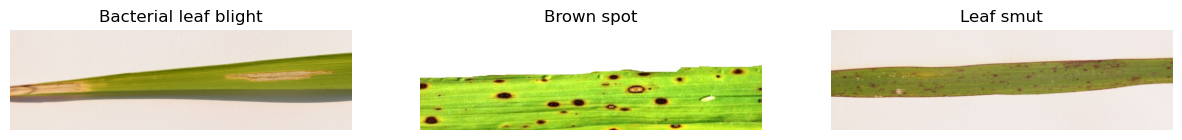

In [5]:
# Display sample images from each class
def display_sample_images(data_dir, class_names):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        sample_image = os.path.join(class_dir, os.listdir(class_dir)[5])
        image = cv2.imread(sample_image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image)
        axes[i].set_title(class_name)
        axes[i].axis('off')
    plt.show()

display_sample_images(data_dir, class_names)

#### Count the Number of Images in Each Class

In [6]:
# Count the Number of Images in Each Class
def count_images(data_dir, class_names):
    image_count = {}
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        image_count[class_name] = len(os.listdir(class_dir))
    return image_count

image_count = count_images(data_dir, class_names)
print(image_count)


{'Bacterial leaf blight': 40, 'Brown spot': 40, 'Leaf smut': 39}


#### Check Image Dimensions

In [7]:
# Check Image Dimensions
def check_image_dimensions(data_dir, class_names):
    dimensions = []
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        sample_image = os.path.join(class_dir, os.listdir(class_dir)[0])
        image = cv2.imread(sample_image)
        dimensions.append(image.shape)
    return dimensions

image_dimensions = check_image_dimensions(data_dir, class_names)
print(image_dimensions)


[(897, 3081, 3), (250, 766, 3), (897, 3081, 3)]


#### Display More Images from Each Class

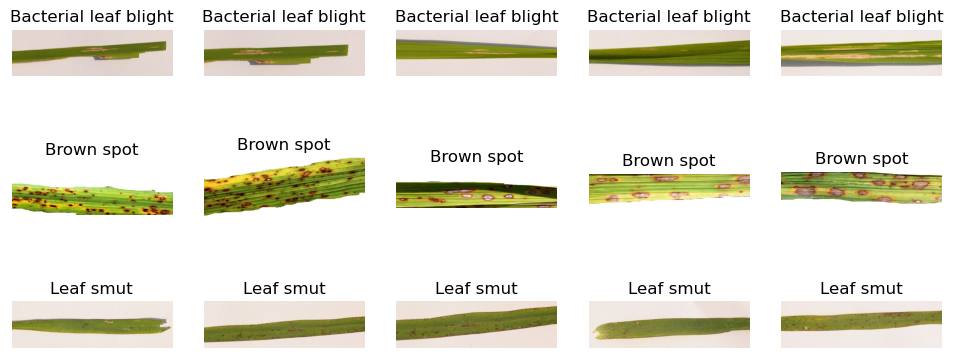

In [8]:
# Display More Images from Each Class
def display_more_images(data_dir, class_names, num_images=5):
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(12, 5))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for j in range(num_images):
            sample_image = os.path.join(class_dir, os.listdir(class_dir)[j])
            image = cv2.imread(sample_image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(image)
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')
    plt.show()

display_more_images(data_dir, class_names)

#### Histogram of Image Intensities

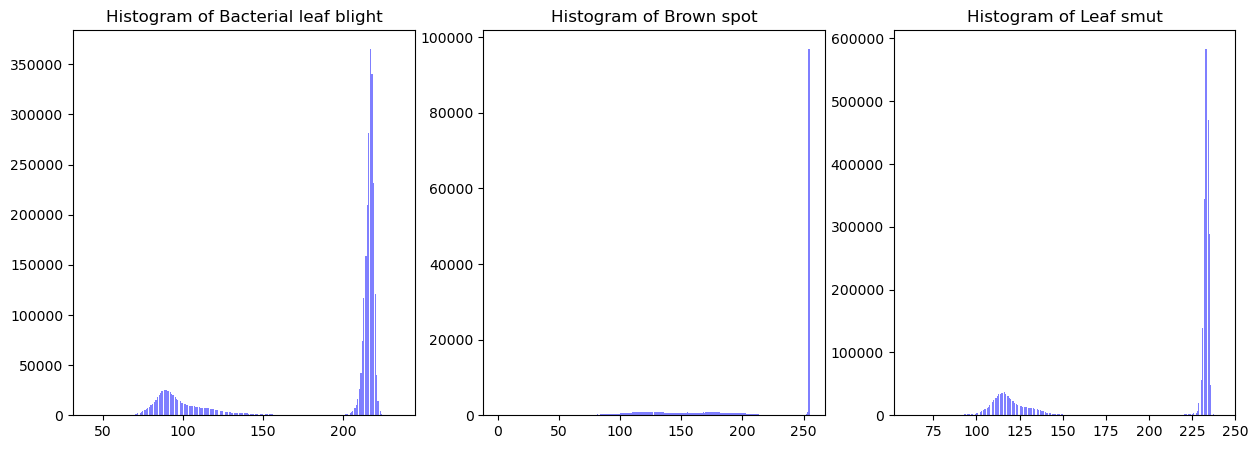

In [9]:
# Display Histogram of Image Intensities
def display_histogram(data_dir, class_names):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        sample_image = os.path.join(class_dir, os.listdir(class_dir)[0])
        image = cv2.imread(sample_image, cv2.IMREAD_GRAYSCALE)
        axes[i].hist(image.ravel(), bins=256, color='blue', alpha=0.5)
        axes[i].set_title(f'Histogram of {class_name}')
    plt.show()

display_histogram(data_dir, class_names)

### 4. Data Preprocessing
##### Create Data Generator and Augmentation
An image data generator is created to apply data augmentation techniques such as rotation, zoom, and horizontal flip to increase the diversity of the training data.
##### Create Training and Validation Generators
Data is split into training and validation sets using the data generator to ensure that the model can be evaluated on unseen data.

####  Define Image Size and Batch Size

In [10]:
# Define Image Size and Batch Size
image_size = (224, 224)
batch_size = 32


#### Create Image Data Generator for Data Augmentation

In [16]:
# Create Image Data Generator for Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)

#### Create Training and Validation Generators

In [17]:
# Create Training and Validation Generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


#### Import framework for traditional Machine Learning

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#### Prepare data for traditional models

In [88]:
# Prepare data for traditional models
def prepare_data(generator):
    features = []
    labels = []
    for x, y in generator:
        features.extend(x)
        labels.extend(y)
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

train_features, train_labels = prepare_data(train_generator)
val_features, val_labels = prepare_data(validation_generator)

# Flatten the images for traditional machine learning models
train_features_flat = train_features.reshape(train_features.shape[0], -1)
val_features_flat = val_features.reshape(val_features.shape[0], -1)

### 5. Model Creation and Evaluation
##### Traditional Models

* SVM (Support Vector Machine): A linear classifier is trained and evaluated using the training data.
* k-NN (k-Nearest Neighbors): A non-parametric method is used for classification.
* Random Forest: An ensemble method with multiple decision trees is employed.

##### CNN Model
A Convolutional Neural Network (CNN) is built and trained. The architecture includes convolutional layers, pooling layers, and dense layers to classify the images.
##### Model Evaluation
Each model’s performance is evaluated based on accuracy, precision, recall, and F1-score.

#### Train SVM model

In [89]:
svm_model = SVC(kernel='linear')
svm_model.fit(train_features_flat, np.argmax(train_labels, axis=1))
svm_predictions = svm_model.predict(val_features_flat)

print('SVM Classification Report:')
print(classification_report(np.argmax(val_labels, axis=1), svm_predictions, target_names=class_names))
svm_accuracy = accuracy_score(np.argmax(val_labels, axis=1), svm_predictions)
print('SVM Accuracy:', svm_accuracy * 100)


SVM Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.67      0.50      0.57         8
            Leaf smut       0.40      0.50      0.44         8
           Brown spot       0.43      0.43      0.43         7

             accuracy                           0.48        23
            macro avg       0.50      0.48      0.48        23
         weighted avg       0.50      0.48      0.48        23

SVM Accuracy: 47.82608695652174


#### Train Random Forest model

In [90]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features_flat, np.argmax(train_labels, axis=1))
rf_predictions = rf_model.predict(val_features_flat)

print('Random Forest Classification Report:')
print(classification_report(np.argmax(val_labels, axis=1), rf_predictions, target_names=class_names))
rf_accuracy = accuracy_score(np.argmax(val_labels, axis=1), rf_predictions)
print('Random Forest Accuracy:', rf_accuracy * 100)

Random Forest Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.70      0.88      0.78         8
            Leaf smut       0.45      0.62      0.53         8
           Brown spot       0.50      0.14      0.22         7

             accuracy                           0.57        23
            macro avg       0.55      0.55      0.51        23
         weighted avg       0.55      0.57      0.52        23

Random Forest Accuracy: 56.52173913043478


#### Train k-NN model

In [91]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_features_flat, np.argmax(train_labels, axis=1))
knn_predictions = knn_model.predict(val_features_flat)

print('k-NN Classification Report:')
print(classification_report(np.argmax(val_labels, axis=1), knn_predictions, target_names=class_names))
knn_accuracy = accuracy_score(np.argmax(val_labels, axis=1), knn_predictions)
print('k-NN Accuracy:', knn_accuracy * 100)

k-NN Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.45      0.62      0.53         8
            Leaf smut       0.36      0.50      0.42         8
           Brown spot       1.00      0.14      0.25         7

             accuracy                           0.43        23
            macro avg       0.61      0.42      0.40        23
         weighted avg       0.59      0.43      0.41        23

k-NN Accuracy: 43.47826086956522


#### Import framework for CNN model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

#### Build CNN model

In [27]:

def cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.6),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3)
num_classes = len(class_names)

#### Compile the model

In [28]:
cnn_model = cnn_model(input_shape, num_classes)
cnn_model.compile(
    loss='categorical_crossentropy',
     optimizer='adam',
    metrics=['accuracy']
)

e:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train and Evaluate the model

In [29]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


# Train the Model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(validation_generator)
print(f'CNN Validation Loss: {cnn_loss}')
print(f'CNN Validation Accuracy: {cnn_accuracy * 100}')

Epoch 1/30


e:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2500 - loss: 7.3200 - val_accuracy: 0.3478 - val_loss: 4.9733
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 844ms/step - accuracy: 0.4102 - loss: 4.7494 - val_accuracy: 0.5652 - val_loss: 3.8271
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.3698 - loss: 3.7478 - val_accuracy: 0.5217 - val_loss: 3.4371
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.3932 - loss: 3.4482 - val_accuracy: 0.6522 - val_loss: 3.2368
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 914ms/step - accuracy: 0.4792 - loss: 3.2202 - val_accuracy: 0.5652 - val_loss: 2.9826
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 812ms/step - accuracy: 0.4453 - loss: 3.0070 - val_accuracy: 0.6522 - val_loss: 2.6658
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 804ms/step - accuracy: 0.4740 - loss: 2.6857 - val_accuracy: 0.5652 - val_loss: 2.4039
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 810ms/step - accuracy: 0.3919 - loss: 2.4305 - val_accuracy: 0.5652 - val_loss: 2.2226
Epoch 

#### Print all model accuracy 

In [92]:
# Collect accuracies
model_accuracies = {
    'SVM': svm_accuracy * 100,
    'Random Forest': rf_accuracy * 100,
    'k-NN': knn_accuracy * 100,
    'CNN': cnn_accuracy * 100
}

# Print the accuracies of all models
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy:.2f}%')


SVM Accuracy: 47.83%
Random Forest Accuracy: 56.52%
k-NN Accuracy: 43.48%
CNN Accuracy: 86.96%


### 6. Model Comparison
##### Comparison Plot: 
* A bar plot is created to compare the accuracy of different models.
* Best Model Selection: 
Based on the evaluation metrics, the best-performing model is suggested for production.

#### Plotting model comparisons

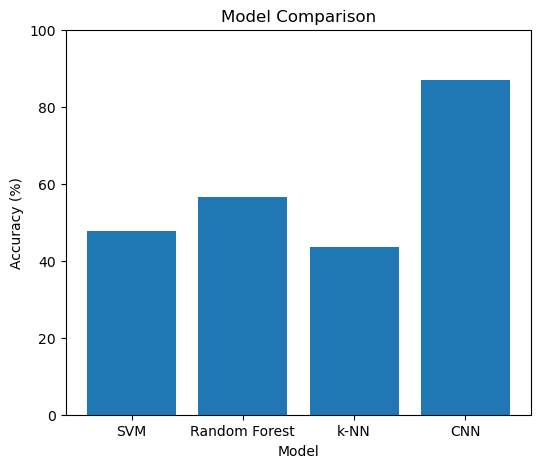

In [93]:
plt.figure(figsize=(6,5))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
plt.show()

### 7. Training and Validation Metrics
Accuracy and Loss Plots: Training and validation accuracy and loss are plotted to visualize model performance and check for overfitting.

#### Extract accuracy and loss values from the CNN history object

In [94]:

history_dict = cnn_history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc) + 1)

#### Plot Training and Validation Accuracy also Loss

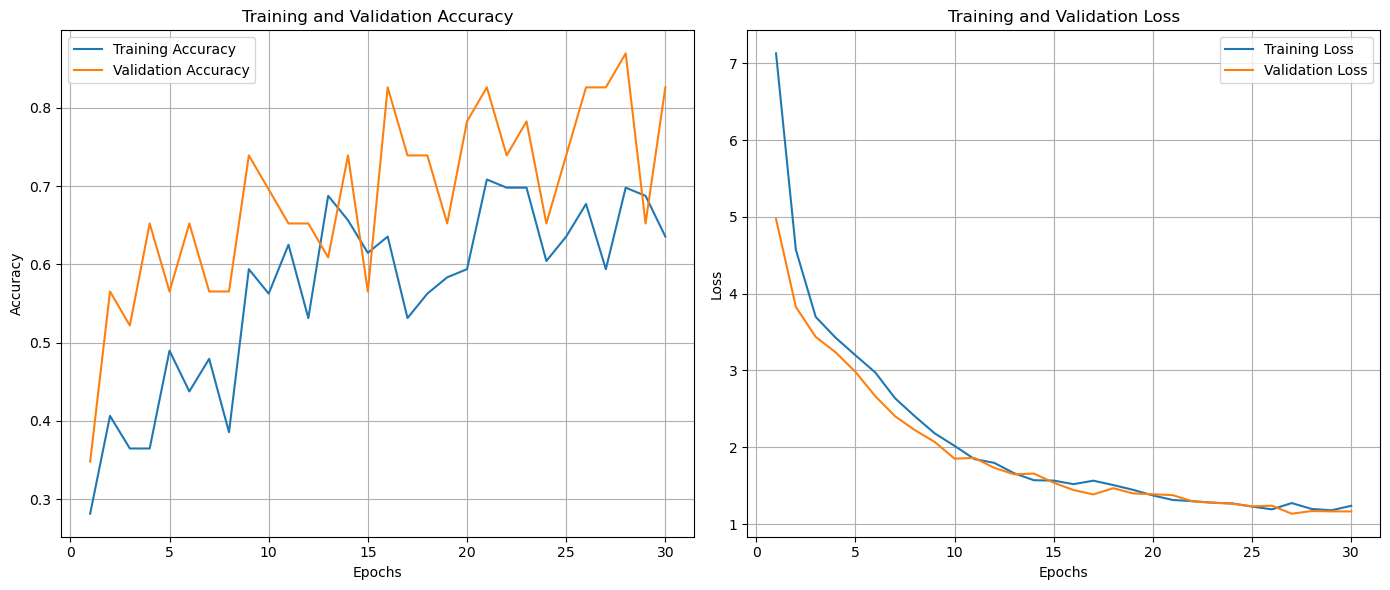

In [100]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 8. Model Deployment
Save CNN Model: The trained CNN model is saved for future use. This includes functions for loading and predicting new images.
* Prediction Example: An example of how to use the model to predict a new image with confidence percentage and class name.

#### Finally save the trained CNN model for random test

In [48]:
cnn_model.save('rice_leaf_disease_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


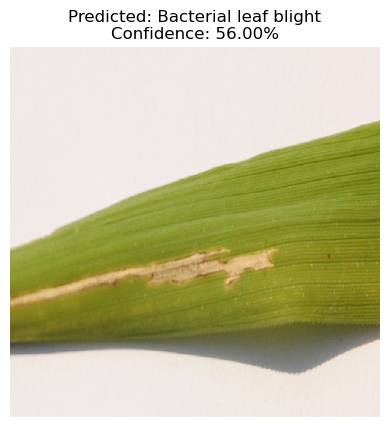

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


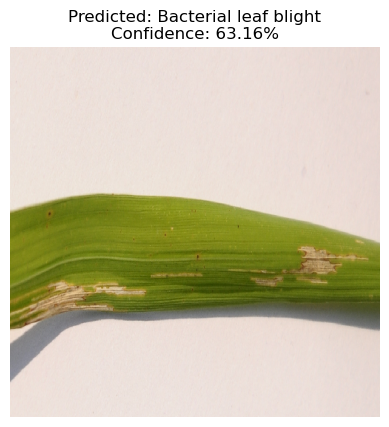

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


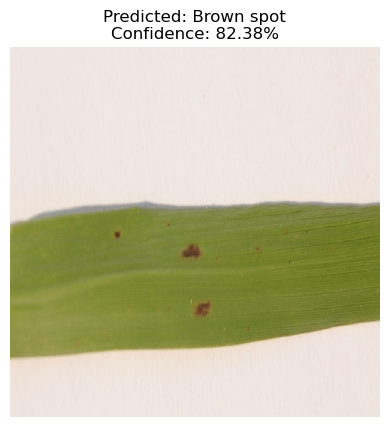

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


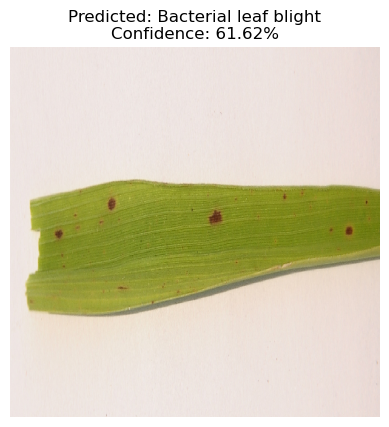

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


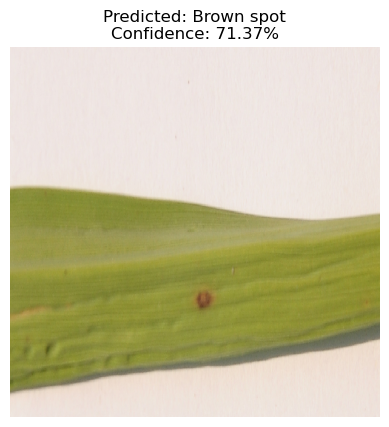

In [82]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


# preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# predict the class of the uploaded image
def predict_class(img_array, model, class_names):
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)
    predicted_class = class_names[predicted_index[0]]
    confidence = np.max(predictions) * 100
    return predicted_class, confidence

# predict disease from multiple uploaded images
def predict_multiple_images(img_paths, model, class_names):
    for img_path in img_paths:
        img_array = preprocess_image(img_path)
        predicted_class, confidence = predict_class(img_array, model, class_names)
        
        # Display the image, prediction, and confidence
        img = image.load_img(img_path, target_size=(500, 500))
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.2f}%')
        plt.axis('off')
        plt.show()

best_model = load_model('rice_leaf_disease_model.h5')

img_paths = [
    'E:\PROJECT.DATAMITES\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight\DSC_0379.JPG',
    'E:\PROJECT.DATAMITES\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight\DSC_0397.JPG',
    'E:\PROJECT.DATAMITES\PRCP-1001-RiceLeaf\Data\Brown spot\DSC_0332.JPG',
    'E:\PROJECT.DATAMITES\PRCP-1001-RiceLeaf\Data\Brown spot\DSC_0337.JPG',
    'E:\PROJECT.DATAMITES\PRCP-1001-RiceLeaf\Data\Brown spot\DSC_0325.JPG'
]

predict_multiple_images(img_paths, best_model, class_names)


### 9. Challenges Faced and Issues
##### Data Challenges

Image Quality: Variations in image quality and lighting conditions led to inconsistencies. Some images were blurry or poorly lit, affecting model performance. This was partially addressed through data augmentation and preprocessing.
Class Imbalance: Despite the initial balance, the small size of the dataset made the model susceptible to overfitting. To mitigate this, additional data augmentation techniques were used to artificially balance the dataset.

##### Model Challenges

* Overfitting: The CNN model showed signs of overfitting, where the model performed well on training data but poorly on validation data. try to managed using techniques like dropout and regularization.
* Model Selection: Different models exhibited varied performance levels. While traditional models like SVM and Random Forest performed adequately, the CNN model required extensive hyperparameter tuning to achieve high accuracy. Balancing the complexity of the model with the size of the dataset was a significant challenge.
9.3. Techniques Used

Data Augmentation: Applied to enhance model generalization by creating variations in training images.
Hyperparameter Tuning: Adjusted learning rates, batch sizes, and network architectures to improve performance and prevent overfitting.
Regularization: Used dropout and L2 regularization to reduce overfitting and improve the generalization of the CNN model.

### 10. Conclusion
* The analysis and model comparison indicate that the CNN model achieved the highest accuracy among the tested models. The report includes detailed metrics and visualizations to support the selection of this model for production. Future work could focus on further fine-tuning the model and expanding the dataset to improve robustness and accuracy.
